In [1]:
import os
import json
import pandas as pd
from typing import Dict, Any
from urllib.request import urlretrieve
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import geopandas as gpd
import folium
from shapely.geometry import Point
from shapely import wkt
import openrouteservice
import polars as pl
import os

# Load the data


In [2]:
df = pd.read_csv('../data/raw/preprocessing_houseprices.csv')
station_df = gpd.read_file('../data/raw/PTV/PTV_METRO_TRAIN_STATION.shp')

# Ensure 'geometry' column exists
if 'geometry' not in df.columns:
    df['geometry'] = None

df['geometry'] = df.apply(lambda row: Point(row["longitude"], row["latitude"]), axis=1)


In [3]:
station_df

,STOP_ID,LATITUDE,STOP_NAME,LONGITUDE,TICKETZONE,ROUTEUSSP,geometry
0,19970,-37.781193,Royal Park Railway Station (Parkville),144.952301,1,Upfield,POINT (144.95231 -37.78118)
1,19971,-37.788140,Flemington Bridge Railway Station (North Melbo...,144.939323,1,Upfield,POINT (144.93933 -37.78813)
2,19972,-37.794267,Macaulay Railway Station (North Melbourne),144.936166,1,Upfield,POINT (144.93617 -37.79425)
3,19973,-37.807419,North Melbourne Railway Station (West Melbourne),144.942570,1,"Flemington,Sunbury,Upfield,Werribee,Williamsto...",POINT (144.94258 -37.80741)
4,19974,-37.788657,Clifton Hill Railway Station (Clifton Hill),144.995417,1,"Mernda,Hurstbridge",POINT (144.99542 -37.78864)
...,...,...,...,...,...,...,...
215,19965,-37.742345,Coburg Railway Station (Coburg),144.963336,1,Upfield,POINT (144.96334 -37.74233)
216,19966,-37.754485,Moreland Railway Station (Coburg),144.961823,1,Upfield,POINT (144.96183 -37.75447)
217,19967,-37.761242,Anstey Railway Station (Brunswick),144.960684,1,Upfield,POINT (144.96069 -37.76123)
218,19968,-37.767721,Brunswick Railway Station (Brunswick),144.959587,1,Upfield,POINT (144.95959 -37.76771)


In [4]:
if not isinstance(df, gpd.GeoDataFrame):
    df = gpd.GeoDataFrame(df, geometry='geometry')

# Convert station_df to GeoDataFrame if not already
if not isinstance(station_df, gpd.GeoDataFrame):
    station_df = gpd.GeoDataFrame(station_df, geometry='geometry')

print(df.crs)
print(station_df.crs)

df = df.set_crs(epsg=4326, allow_override=True)  # Set to WGS 84 if not already set
station_df = station_df.to_crs(epsg=4326)


df = df.to_crs(epsg=32755) 
station_df = station_df.to_crs(epsg=32755)

#  to calculate the distance between each house and the closest train station... straight line distance

def calculate_distance(row, station_df):
    global done
    distances = []
    names = []
    for station in station_df.iterrows():
        distances.append(row['geometry'].distance(station[1]['geometry']))
        names.append(station[1]['STOP_NAME'])

    # min distance in km and name of the closest station
    return min(distances)/1000, names[distances.index(min(distances))]

print()
print(calculate_distance(df.iloc[1], station_df))
#  apply the function to the dataframe

None
EPSG:7844

(15.03534994627615, 'Diggers Rest Railway Station (Diggers Rest)')


In [25]:
station_df

,STOP_ID,LATITUDE,STOP_NAME,LONGITUDE,TICKETZONE,ROUTEUSSP,geometry
0,19970,-37.781193,Royal Park Railway Station (Parkville),144.952301,1,Upfield,POINT (319675.486 5816488.467)
1,19971,-37.788140,Flemington Bridge Railway Station (North Melbo...,144.939323,1,Upfield,POINT (318549.485 5815692.468)
2,19972,-37.794267,Macaulay Railway Station (North Melbourne),144.936166,1,Upfield,POINT (318286.463 5815006.441)
3,19973,-37.807419,North Melbourne Railway Station (West Melbourne),144.942570,1,"Flemington,Sunbury,Upfield,Werribee,Williamsto...",POINT (318882.513 5813559.451)
4,19974,-37.788657,Clifton Hill Railway Station (Clifton Hill),144.995417,1,"Mernda,Hurstbridge",POINT (323490.513 5815742.519)
...,...,...,...,...,...,...,...
215,19965,-37.742345,Coburg Railway Station (Coburg),144.963336,1,Upfield,POINT (320553.452 5820820.473)
216,19966,-37.754485,Moreland Railway Station (Coburg),144.961823,1,Upfield,POINT (320449.503 5819470.453)
217,19967,-37.761242,Anstey Railway Station (Brunswick),144.960684,1,Upfield,POINT (320365.499 5818718.471)
218,19968,-37.767721,Brunswick Railway Station (Brunswick),144.959587,1,Upfield,POINT (320284.521 5817997.427)


In [5]:
# df['geometry'] = gpd.GeoSeries(df['geometry']).set_crs("EPSG:32633", allow_override=True)
# station_df['geometry'] = gpd.GeoSeries(station_df['geometry']).set_crs("EPSG:32633", allow_override=True)




df_st_ = gpd.sjoin_nearest(df, station_df[['STOP_NAME', 'geometry']], how="left", distance_col="distance")


In [6]:
df_st_

,unique_id,postcode,suburb,property_type,address,rent,num_bedrooms,num_bathrooms,parking,distance_to_cbd,Listing date,latitude,longitude,geometry,index_right,STOP_NAME,distance
0,33228344,3040.0,essendon,townhouse,"5/61 Vanberg Road, Essendon VIC 3040",400.0,3.0,1.0,1.0,7.09,Dec 2012,-37.754148,144.934050,POINT (318001.273 5819452.697),55.0,Strathmore Railway Station (Strathmore),1314.542643
1,34904767,3337.0,melton west,house,"24 carramar st, Melton West VIC 3337",449.0,4.0,2.0,2.0,39.40,Mar 2015,-37.664852,144.556370,POINT (284466.399 5828559.856),76.0,Diggers Rest Railway Station (Diggers Rest),15035.349946
2,33168175,3550.0,bendigo,house,"2A,3 Stone Street, Bendigo VIC 3550",270.0,3.0,1.0,2.0,134.93,Jun 2013,-36.738890,144.254916,POINT (254893.683 5930579.005),75.0,Sunbury Railway Station (Sunbury),102273.002583
3,34938488,3006.0,southbank,apartment,"3304/283 City Road, Southbank VIC 3006",585.0,2.0,2.0,1.0,1.56,Apr 2015,-37.827305,144.959050,POINT (320381.145 5811383.124),104.0,Flinders Street Railway Station (Melbourne City),1219.429037
4,33957241,3178.0,rowville,house,"3 Hillview Avenue, Rowville VIC 3178",390.0,3.0,1.0,2.0,26.46,Mar 2015,-37.920490,145.232380,POINT (344634.189 5801533.596),118.0,Ferntree Gully Railway Station (Ferntree Gully),7008.686832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745584,311214861,3186.0,brighton,house,"110 Cochrane Street, Brighton VIC 3186",650.0,3.0,2.0,2.0,9.70,Sep 2016,-37.895790,145.000020,POINT (324150.059 5803861.617),203.0,Gardenvale Railway Station (Brighton),378.541479
745585,311214873,3163.0,carnegie,house,"1/20 Maroona Road, Carnegie VIC 3163",405.0,2.0,1.0,1.0,11.21,Nov 2016,-37.889412,145.047320,POINT (328294.535 5804657.516),192.0,Glenhuntly Railway Station (Glen Huntly),448.999885
745586,311214878,3340.0,bacchus marsh,house,"25 Dewar Crescent, Bacchus Marsh VIC 3340",360.0,4.0,2.0,2.0,50.05,Jul 2016,-37.690685,144.415370,POINT (272106.887 5825359.319),76.0,Diggers Rest Railway Station (Diggers Rest),27792.090641
745587,311214885,3135.0,heathmont,house,"10 Lorienne Street, Heathmont VIC 3135",350.0,3.0,1.0,2.0,23.53,Jan 2017,-37.827587,145.230380,POINT (344262.851 5811839.042),121.0,Heathmont Railway Station (Heathmont),1250.879601


In [7]:
station_df[station_df['STOP_NAME'] == 'Diggers Rest Railway Station (Diggers Rest)']

,STOP_ID,LATITUDE,STOP_NAME,LONGITUDE,TICKETZONE,ROUTEUSSP,geometry
76,15353,-37.627017,Diggers Rest Railway Station (Diggers Rest),144.719922,2,Sunbury,POINT (298792.447 5833123.417)


In [8]:
df_st_['distance']=df_st_['distance']/1000

In [9]:
sa2_df = gpd.read_file('../data/raw/SA2_2021_AUST_GDA2020.shp')


In [10]:
sa2_df['AUS_NAME21'].unique()
sa2_df['STE_NAME21'].unique()
sa2_df = sa2_df[sa2_df['STE_NAME21'] == 'Victoria']
sa2_df = sa2_df[sa2_df['geometry'] != None]
sa2_df = sa2_df[sa2_df['AUS_NAME21'] != 'Outside Australia']

sa2_df = sa2_df.rename_geometry('sa2_geometry')
sa2_df = sa2_df[['SA2_NAME21', 'sa2_geometry']]

#  extra preprocessing to get the sa2 name and geometry



In [11]:
df_st_ = df_st_.drop(columns='index_right')
df_w_sa2 = df_st_ 

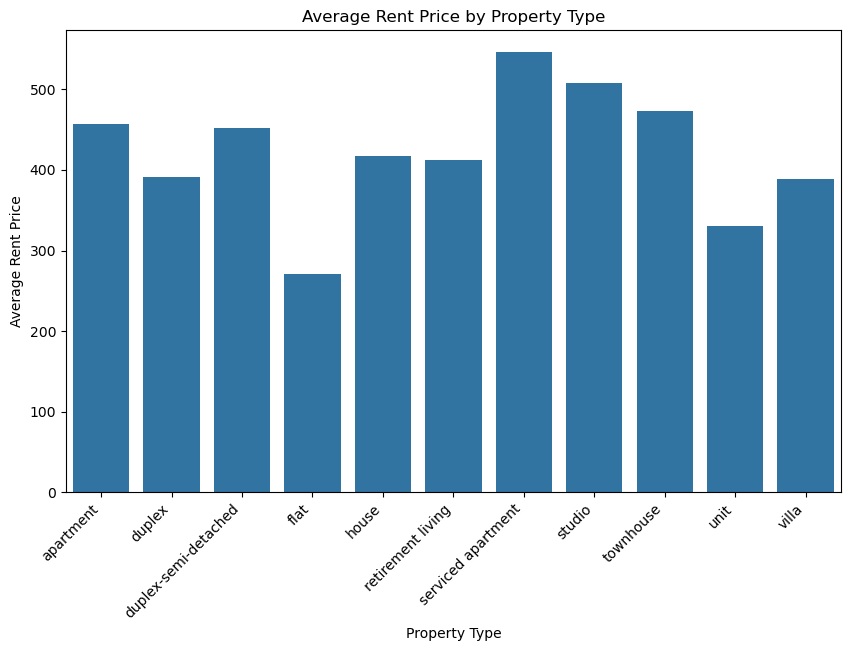

In [12]:
# draw a bar graph of the property type vs average rent price
avg_rent_by_property_type = df_w_sa2.groupby('property_type') 

avg_rent_by_property_type = avg_rent_by_property_type.agg({'rent': 'mean'}).reset_index()
avg_rent_by_property_type
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_rent_by_property_type, x='property_type', y='rent')
plt.xlabel('Property Type')

plt.ylabel('Average Rent Price')

plt.title('Average Rent Price by Property Type')
plt.xticks(rotation=45, ha='right')  # Add horizontal alignment to ensure spacing
plt.show()

# put adequte spacing between the bar names


/var/folders/lh/3pyg7bbj38b6_468dvhq3hnm0000gp/T/ipykernel_8501/3918560648.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rent_per_bin = df_st_.groupby('distance_bins')['rent'].mean().reset_index()


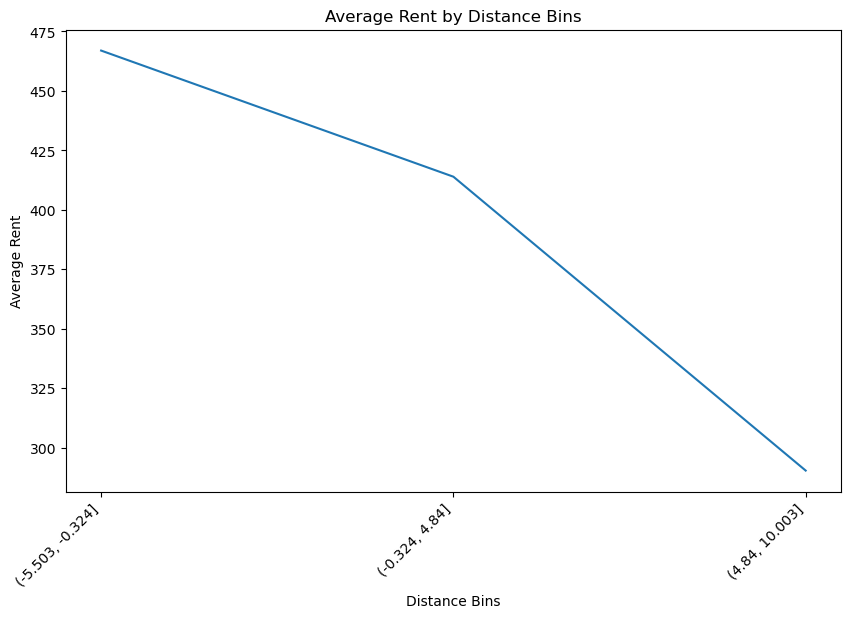

In [13]:
plt.figure(figsize=(10, 6))
df_st_['log_distance'] = np.log(df_st_['distance'])
df_st_['distance_bins'] = pd.cut(df_st_['log_distance'], bins=3) 

average_rent_per_bin = df_st_.groupby('distance_bins')['rent'].mean().reset_index()

# // average 

average_rent_per_bin['distance_bins'] = average_rent_per_bin['distance_bins'].astype(str)

# plot the average rent price by distance bins
sns.lineplot(data=average_rent_per_bin, x='distance_bins', y='rent')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Distance Bins')

plt.ylabel('Average Rent')
plt.title('Average Rent by Distance Bins')
plt.show()

In [14]:
df_st_['num_bedrooms'].unique()
df_st_['num_bathrooms'].unique()

# plot the average rent price by number of bedrooms

array([1., 2., 3., 4., 5., 6.])

In [15]:
avrg_bedroom = df_st_.groupby('num_bedrooms')['rent'].mean().reset_index()
avrg_bathroom = df_st_.groupby('num_bathrooms')['rent'].mean().reset_index()

#  plot the average rent price by number of bedrooms


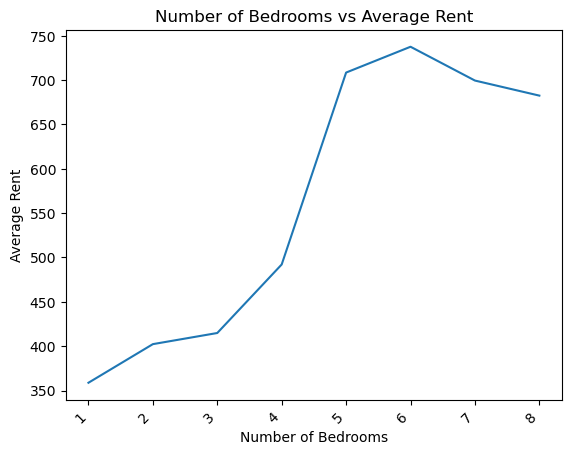

In [16]:

# the average rent price by number of bedrooms

sns.lineplot(data=avrg_bedroom, x='num_bedrooms', y='rent')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Number of Bedrooms')

plt.ylabel('Average Rent')
plt.title('Number of Bedrooms vs Average Rent')
plt.show()

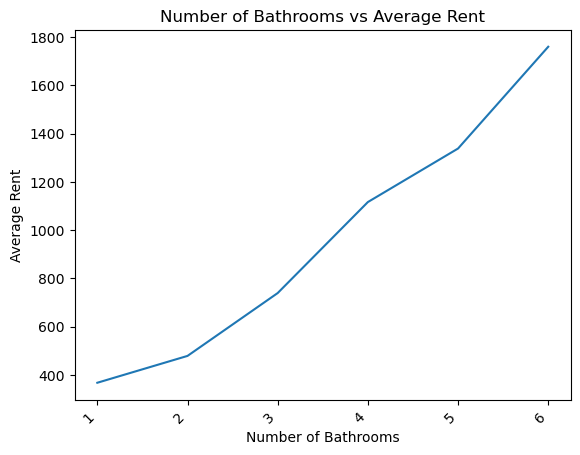

In [17]:
#  plot the average rent price by number of bathrooms
sns.lineplot(data=avrg_bathroom, x='num_bathrooms', y='rent')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Number of Bathrooms')

plt.ylabel('Average Rent')
plt.title('Number of Bathrooms vs Average Rent')
plt.show()

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


#  anova test for number of bedrooms, to see if the number of bedrooms has an actual effect on the rent price
anova_onbathrooms = df_st_[["num_bathrooms",'rent']]

model = ols('rent ~ C(num_bathrooms)', data=anova_onbathrooms).fit()

anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                        sum_sq        df             F  PR(>F)
C(num_bathrooms)  5.061329e+09       5.0  32973.744579     0.0
Residual          2.288876e+10  745583.0           NaN     NaN


In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


#  anova test for number of bedrooms, to see if the number of bedrooms has an actual effect on the rent price

anova_onbedrooms = df_st_[["num_bedrooms",'rent']]

model = ols('rent ~ C(num_bedrooms)', data=anova_onbedrooms).fit()

anova_table = sm.stats.anova_lm(model, type=2)

print(anova_table)

                       df        sum_sq       mean_sq            F  PR(>F)
C(num_bedrooms)       7.0  1.956542e+09  2.795060e+08  8017.158037     0.0
Residual         745581.0  2.599355e+10  3.486348e+04          NaN     NaN


In [20]:
df_w_sa2

,unique_id,postcode,suburb,property_type,address,rent,num_bedrooms,num_bathrooms,parking,distance_to_cbd,Listing date,latitude,longitude,geometry,STOP_NAME,distance,log_distance,distance_bins
0,33228344,3040.0,essendon,townhouse,"5/61 Vanberg Road, Essendon VIC 3040",400.0,3.0,1.0,1.0,7.09,Dec 2012,-37.754148,144.934050,POINT (318001.273 5819452.697),Strathmore Railway Station (Strathmore),1.314543,0.273489,"(-0.324, 4.84]"
1,34904767,3337.0,melton west,house,"24 carramar st, Melton West VIC 3337",449.0,4.0,2.0,2.0,39.40,Mar 2015,-37.664852,144.556370,POINT (284466.399 5828559.856),Diggers Rest Railway Station (Diggers Rest),15.035350,2.710404,"(-0.324, 4.84]"
2,33168175,3550.0,bendigo,house,"2A,3 Stone Street, Bendigo VIC 3550",270.0,3.0,1.0,2.0,134.93,Jun 2013,-36.738890,144.254916,POINT (254893.683 5930579.005),Sunbury Railway Station (Sunbury),102.273003,4.627646,"(-0.324, 4.84]"
3,34938488,3006.0,southbank,apartment,"3304/283 City Road, Southbank VIC 3006",585.0,2.0,2.0,1.0,1.56,Apr 2015,-37.827305,144.959050,POINT (320381.145 5811383.124),Flinders Street Railway Station (Melbourne City),1.219429,0.198383,"(-0.324, 4.84]"
4,33957241,3178.0,rowville,house,"3 Hillview Avenue, Rowville VIC 3178",390.0,3.0,1.0,2.0,26.46,Mar 2015,-37.920490,145.232380,POINT (344634.189 5801533.596),Ferntree Gully Railway Station (Ferntree Gully),7.008687,1.947150,"(-0.324, 4.84]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745584,311214861,3186.0,brighton,house,"110 Cochrane Street, Brighton VIC 3186",650.0,3.0,2.0,2.0,9.70,Sep 2016,-37.895790,145.000020,POINT (324150.059 5803861.617),Gardenvale Railway Station (Brighton),0.378541,-0.971430,"(-5.503, -0.324]"
745585,311214873,3163.0,carnegie,house,"1/20 Maroona Road, Carnegie VIC 3163",405.0,2.0,1.0,1.0,11.21,Nov 2016,-37.889412,145.047320,POINT (328294.535 5804657.516),Glenhuntly Railway Station (Glen Huntly),0.449000,-0.800733,"(-5.503, -0.324]"
745586,311214878,3340.0,bacchus marsh,house,"25 Dewar Crescent, Bacchus Marsh VIC 3340",360.0,4.0,2.0,2.0,50.05,Jul 2016,-37.690685,144.415370,POINT (272106.887 5825359.319),Diggers Rest Railway Station (Diggers Rest),27.792091,3.324751,"(-0.324, 4.84]"
745587,311214885,3135.0,heathmont,house,"10 Lorienne Street, Heathmont VIC 3135",350.0,3.0,1.0,2.0,23.53,Jan 2017,-37.827587,145.230380,POINT (344262.851 5811839.042),Heathmont Railway Station (Heathmont),1.250880,0.223847,"(-0.324, 4.84]"


In [21]:

# map_center = [gdf_stations['LATITUDE'].mean(), gdf_stations['LONGITUDE'].mean()]
# m = folium.Map(location=map_center, zoom_start=10)

# # Add zones (polygons) to the map for Victoria
# folium.GeoJson(gdf_zones_vic, name="Victoria Zones").add_to(m)

# # Add train station markers to the map
# for _, row in gdf_stations.iterrows():
#     folium.Marker(
#         location=[row['LATITUDE'], row['LONGITUDE']],
#         popup=f"Station: {row['STOP_NAME']}, Ticket Zone: {row['TICKETZONE']}",
#         tooltip=row['STOP_NAME']
#     ).add_to(m)

# # Add layer control to toggle zones and stations
# folium.LayerControl().add_to(m)

# m

In [23]:
df_w_sa2

,unique_id,postcode,suburb,property_type,address,rent,num_bedrooms,num_bathrooms,parking,distance_to_cbd,Listing date,latitude,longitude,geometry,STOP_NAME,distance,log_distance,distance_bins
0,33228344,3040.0,essendon,townhouse,"5/61 Vanberg Road, Essendon VIC 3040",400.0,3.0,1.0,1.0,7.09,Dec 2012,-37.754148,144.934050,POINT (318001.273 5819452.697),Strathmore Railway Station (Strathmore),1.314543,0.273489,"(-0.324, 4.84]"
1,34904767,3337.0,melton west,house,"24 carramar st, Melton West VIC 3337",449.0,4.0,2.0,2.0,39.40,Mar 2015,-37.664852,144.556370,POINT (284466.399 5828559.856),Diggers Rest Railway Station (Diggers Rest),15.035350,2.710404,"(-0.324, 4.84]"
2,33168175,3550.0,bendigo,house,"2A,3 Stone Street, Bendigo VIC 3550",270.0,3.0,1.0,2.0,134.93,Jun 2013,-36.738890,144.254916,POINT (254893.683 5930579.005),Sunbury Railway Station (Sunbury),102.273003,4.627646,"(-0.324, 4.84]"
3,34938488,3006.0,southbank,apartment,"3304/283 City Road, Southbank VIC 3006",585.0,2.0,2.0,1.0,1.56,Apr 2015,-37.827305,144.959050,POINT (320381.145 5811383.124),Flinders Street Railway Station (Melbourne City),1.219429,0.198383,"(-0.324, 4.84]"
4,33957241,3178.0,rowville,house,"3 Hillview Avenue, Rowville VIC 3178",390.0,3.0,1.0,2.0,26.46,Mar 2015,-37.920490,145.232380,POINT (344634.189 5801533.596),Ferntree Gully Railway Station (Ferntree Gully),7.008687,1.947150,"(-0.324, 4.84]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745584,311214861,3186.0,brighton,house,"110 Cochrane Street, Brighton VIC 3186",650.0,3.0,2.0,2.0,9.70,Sep 2016,-37.895790,145.000020,POINT (324150.059 5803861.617),Gardenvale Railway Station (Brighton),0.378541,-0.971430,"(-5.503, -0.324]"
745585,311214873,3163.0,carnegie,house,"1/20 Maroona Road, Carnegie VIC 3163",405.0,2.0,1.0,1.0,11.21,Nov 2016,-37.889412,145.047320,POINT (328294.535 5804657.516),Glenhuntly Railway Station (Glen Huntly),0.449000,-0.800733,"(-5.503, -0.324]"
745586,311214878,3340.0,bacchus marsh,house,"25 Dewar Crescent, Bacchus Marsh VIC 3340",360.0,4.0,2.0,2.0,50.05,Jul 2016,-37.690685,144.415370,POINT (272106.887 5825359.319),Diggers Rest Railway Station (Diggers Rest),27.792091,3.324751,"(-0.324, 4.84]"
745587,311214885,3135.0,heathmont,house,"10 Lorienne Street, Heathmont VIC 3135",350.0,3.0,1.0,2.0,23.53,Jan 2017,-37.827587,145.230380,POINT (344262.851 5811839.042),Heathmont Railway Station (Heathmont),1.250880,0.223847,"(-0.324, 4.84]"


In [24]:
df_w_sa2 = df_w_sa2.drop(columns=['address',"log_distance","distance_bins",'STOP_NAME','geometry'])
df_w_sa2.to_csv('../data/raw/trainstation_sa2_perhouse.csv', index=False)

#  save the data to a csv file